In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analise-credito/analise_credito.csv


**Introdução:** 
   
   O presente notebook visa fornecer uma analise abrangente e informativa sobre os clientes de uma determinada instituição financeira, com foco na compreensão dos padrões de clientes de adimplência e inadimplência, representados pela coluna chamada de default, que indica se um cliente é adimplente (default = 0), ou inadimplente (default = 1). Os passos descritos serão acompanhados de explicações detalhadas e comentários pertinentes para facilitar a compreensão e interpretação dos resultados.
   
   

**Código de importação de bibliotecas:**

Aqui iremos importar as bibliotecas para manipulação/limpeza e visulização dos dados.

In [2]:
#Manipulção, limpeza e visualização dos dados
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#ignore a ultima biclioteca
import warnings
warnings.filterwarnings('ignore')


**Código de download e carregamentos dos dados:**


Neste bloco de código foi feito o download dos dados utilizados na análise e declaração dos valores nulos da tabelas que estão como *na* .

Após o fornecimento dos dados através de uma URL, transportamos essa base de dados para um arquivo local(csv). Após esse processo importamos esse arquivo para o notebook da forma proposta abaixo:

In [3]:
df = pd.read_csv('/kaggle/input/analise-credito/analise_credito.csv', na_values= 'na')

**Analise exploratória dos dados**:


A partir desta base de dados vamos explorar quais correlções entre categorias podemos fazer para entender melhor o comportamento e caracteristicas das pessoas que acabam se endividando. Estas categorias podem ser: escolaridade, estado civil, salário anual, tipo de cartão, dependentes, limite de crédito, entre outras.

Abaixo temos a lista completa dos atributos.


| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Diante de uma primeira e simples analise exploratoria plotamos as 15 primeiras linhas para que não sobrecarregue o processamento dos dados. 

In [4]:
df.head(16)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


**2.1 Estrutura do dataframe**

In [5]:
#Quantidade total de linhas e colunas.
df.shape

(10127, 16)

In [6]:
#Quantidade de linhas e colunas da categoria adimplentes.
df[df['default'] == 0].shape

(8500, 16)

In [7]:
#Quantidade de linhas e colunas da categoria inadimplentes.
df[df['default'] == 1].shape

(1627, 16)

In [8]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [9]:
print(f'A porcentagem de clientes adimplentes é de: {round(100 * qtd_adimplentes / qtd_total, 2)}%') 
print(f'A porcentagem de clientes inadimplentes é de: {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A porcentagem de clientes adimplentes é de: 83.93%
A porcentagem de clientes inadimplentes é de: 16.07%


**Vamos explorar as colunas do dataframe e seus respectivos tipos de dados.**

Iremos agora explorar as colunas para averiguar se os tipos estão adequados a coluna. Aqui teremos uma noção maior de qual mainupilação na tipagem precisará ser feita.

In [10]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Quem já tem alguma experiencia logo percebe que a coluna **limite_credito** e **valor_transacoes_12m** não deveriam estar listados como dados categóricos (object). Segue abaixo um data frame para deixar isso mais evidente.

In [11]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


* Atributos categóricos são atributos limitados e que descrevem uma categoria (gênero, escolaridade, etc). Sabendo disso fica evidente que colunas como **limite_credito** e **valor_treansacoes_12m** não se enquadram na categoria.

* Atributos do tipo númerico são todos que ultizam números.

In [12]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


**Dados faltantes:**

Ao plotar o dataframe percebemos algumas linhas com dados faltantes, eles estão representados por ***NaN***. Veja abaixo:

In [13]:
df.head(20)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Vamos verificar quais colunas possuem dados faltantes usando o metodo **isna()**, nativo do **Pandas**. Este metodo vai nos retornar um *bool*, onde True será correspondente a colunas com valores faltantes, e False para colunas que não possuem valores faltantes.

In [14]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Diante desta situação se torna necessária a contagem de linhas que estão com dados faltantes. Compararemos se a procentagem de dados faltantes nas colunas de adimplência e inadimplência são próximas as respectivas colunas do dataframe original. 

In [15]:
def stats_dados_faltantes (df:pd.DataFrame) -> None:
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _=df[df[col].isna()].shape
            total, _=df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, 'percentagem': round(100 * qtd/total,2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)
            
    for stat in stats_dados_faltantes:
        print(stat)
        

In [16]:
#total
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'percentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'percentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'percentagem': 10.98}}


In [17]:
#adimplentes
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'percentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'percentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'percentagem': 10.88}}


In [18]:
#inadimplentes
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'percentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'percentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'percentagem': 11.49}}


Notamos que a proporção dos dados faltantes nos três dataframes são praticamente a mesma. Desta forma podemos eliminar as linhas que contém dados faltantes sem prejudicar a analise dos dados.

**Transformação e limpeza dos dados**

Com os problemas dos dados já evidenciados agora vamos realizar as transformações e limpezas necessarias para que assim sejam melhor analisados. Teremos dois problemas a tratar:
* Duas colunas (**limite_credito, valor_transacoes_12m**) estão com a tipagem errada.
* Temos dados faltantes que podem ser retirados do dataframe.



In [19]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=7)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"
5,"4.010,69","1.088,07"
6,"34.516,72","1.330,87"


Foi criado uma função lambda para tratamento dos dados, esta função retira o primeiro ponto; em seguida troca a virgula por ponto, desta forma a coluna será lida como *float*. Antes de sua aplicação real, esta função será testada; o metodo ultilizado será o map.

In [21]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Feito o teste com sucesso, agora basta aplicar nas colunas de interesse ultilizando o método **apply()**

In [22]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [23]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08


Conferindo se a tipagem esta realmente correta:

In [24]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

**Remoção de dados faltantes**

Com o auxilio do pandas a remoção de dados faltantes se torna algo simples.

In [25]:
df.dropna(inplace = True)

Vamos analisar novamente a estrutura do dataframe.

In [26]:
df.shape

(7081, 16)

In [27]:
df[df['default']==0].shape

(5968, 16)

In [28]:
df[df['default']==1].shape

(1113, 16)

In [29]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [30]:
print(f"A proporcão adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print('')
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%

A nova proporcão de clientes adimplentes é de 84.28%
A nova proporcão de clientes inadimplentes é de 15.72%


**Visualização dos dados (analise explanatória):**

Nesta seção com os dados já prontos iremos explanar algumas visualizações e correlacionar variaveis na busca do entendimento de padrões de clientes adimplentes e inadimplentes. As bibliotecas de visualização de dados já foram importadas anteriormente, são elas:

*seaborn as sns*

*matplotlib.pyplot as plt*


In [31]:
sns.set_style("whitegrid")
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

**Vamos começar pelos dados categóricos:**

In [32]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


* **Escolaridade**

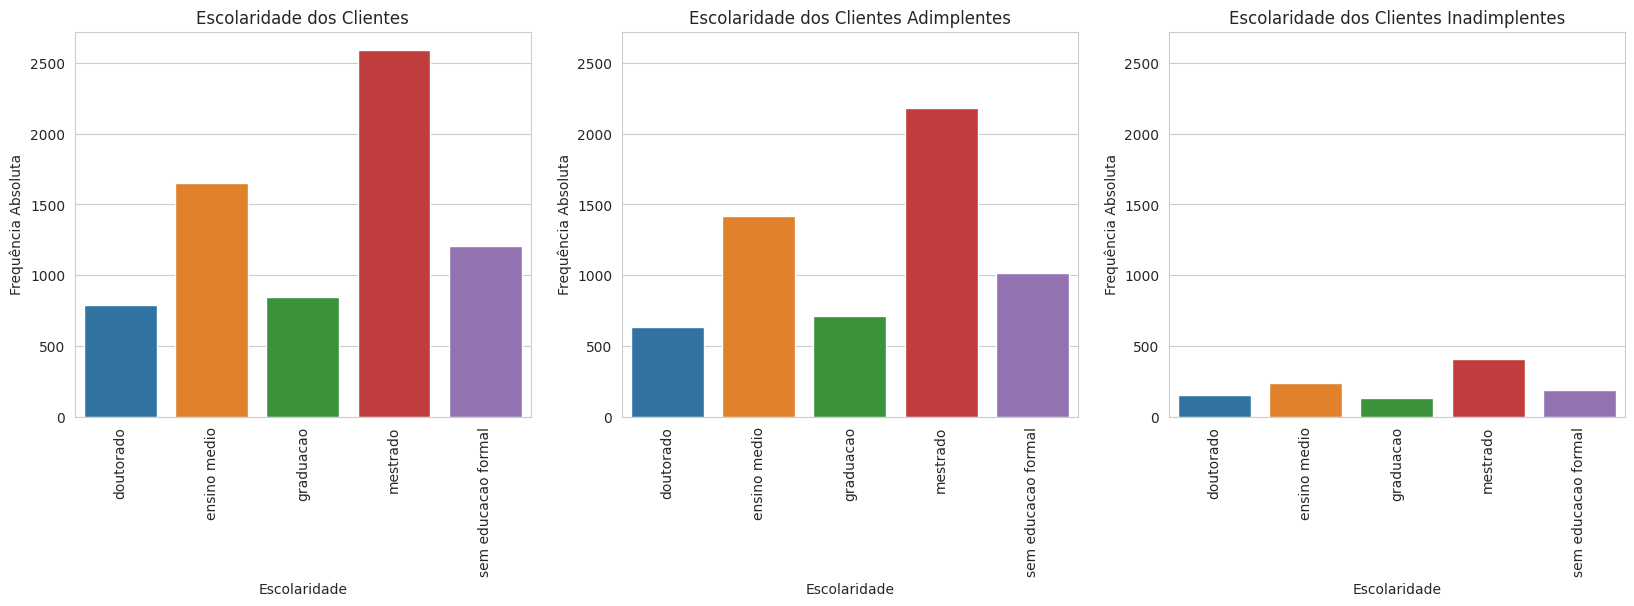

In [33]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0

# encontrando o valor máximo de frequência para ajustar o gráfico
max_freq = df[coluna].value_counts().max() * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# loop para criar os gráficos
for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)

    # plotando o gráfico de barras
    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
 
    # ajustando o limite do eixo y
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
    
    figura.show()

Aqui percebemos que o atributo escolariadade não é muito relevante, pois segue proporcional para clientes adimplentes e inadimplentes.

* **Tipo de cartão**

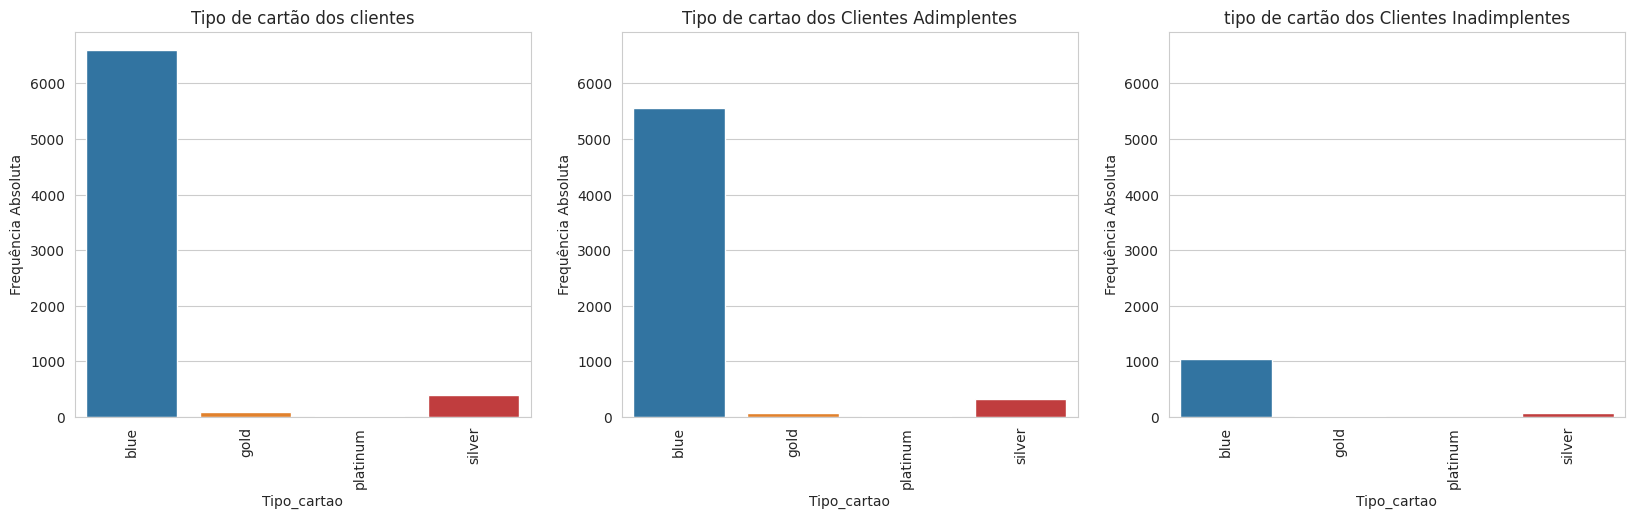

In [34]:
coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos clientes', 'Tipo de cartao dos Clientes Adimplentes',
           'tipo de cartão dos Clientes Inadimplentes']
eixo = 0
max_y = 0

# encontrando o valor máximo de frequência para ajustar o gráfico
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# loop para criar os gráficos
for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().reset_index()  # Cria um novo DataFrame com as contagens
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)    

    # plotando o gráfico de barras
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)

    # ajustando o limite do eixo y
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

    figura.show()
  

Neste atributo conseguimos analisar algo interessante! Existe uma presença perceptível de clientes inadimplentes com cartões *silver* , sugerindo que o cartão pode estar associado a um maior risco de inadimplência. Outro ponto interessante a se ressaltar é que a ausência de clientes inadimplentes com cartões **platinum** e muito poucos com o cartão **gold**, nos sugerindo que esses clientes têm menor probabilidade de inadimplência, possivelmente devido a critérios de seleção mais rigorosos ou a benefícios e suportes associados a esses tipos de cartões que ajudam a prevenir inadimplência.

**Visualizações de dados numéricos:**

Aqui iremos visualizar as correlações entre a variável default com os dados numéricos.

In [35]:
df.drop(['id','default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


* **Quantidade de transações no ultimo ano**

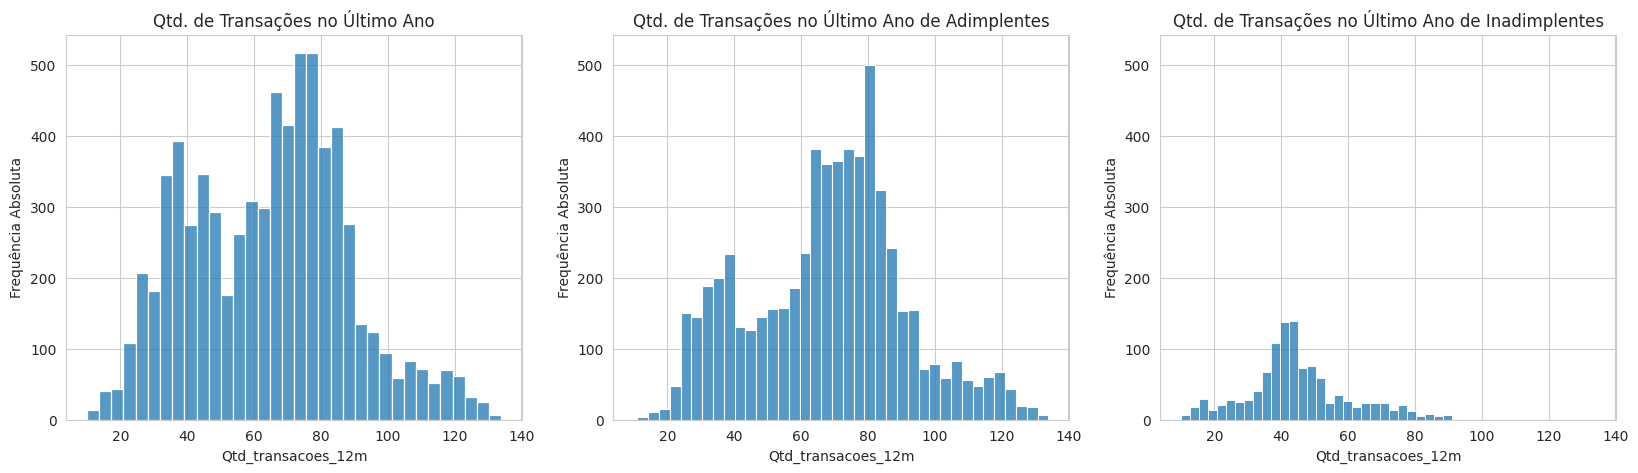

In [36]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 
           'Qtd. de Transações no Último Ano de Adimplentes', 
           'Qtd. de Transações no Último Ano de Inadimplentes']
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

# loop para criar os gráficos
for dataframe in [df, df_adimplente, df_inadimplente]:
    
    # plotando o gráfico
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), 
                               ylabel='Frequência Absoluta')
    
    # ajustando o limite do eixo y
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

    figura.show()

Nesta seção podemos tirar algumas conclusões importantes:


 Em relação aos clientes adimplentes, a cauda direita (mais transações) parece ser mais alongada em comparação com os inadimplentes, o que pode indicar que clientes adimplentes tendem a fazer **mais transações de forma consistente**.
 Clientes adimplentes têm uma distribuição de transações mais ampla e mais elevada, indicando que eles tendem a ser **mais ativos** em termos de transações anuais. Sua concentração se encontra entre 40 e 80 transações por ano


Em relação aos clientes inadimplentes a cauda esquerda (menos transações) é mais pronunciada, indicando que os inadimplentes tendem a fazer **menos transações**.
 Clientes inadimplentes realizam significativamente **menos transações**, com o pico de frequência de transações sendo menor comparado aos adimplentes. Sua concentração se encontra entre 20 e 60.

* **Valor de transções no ultimo ano**

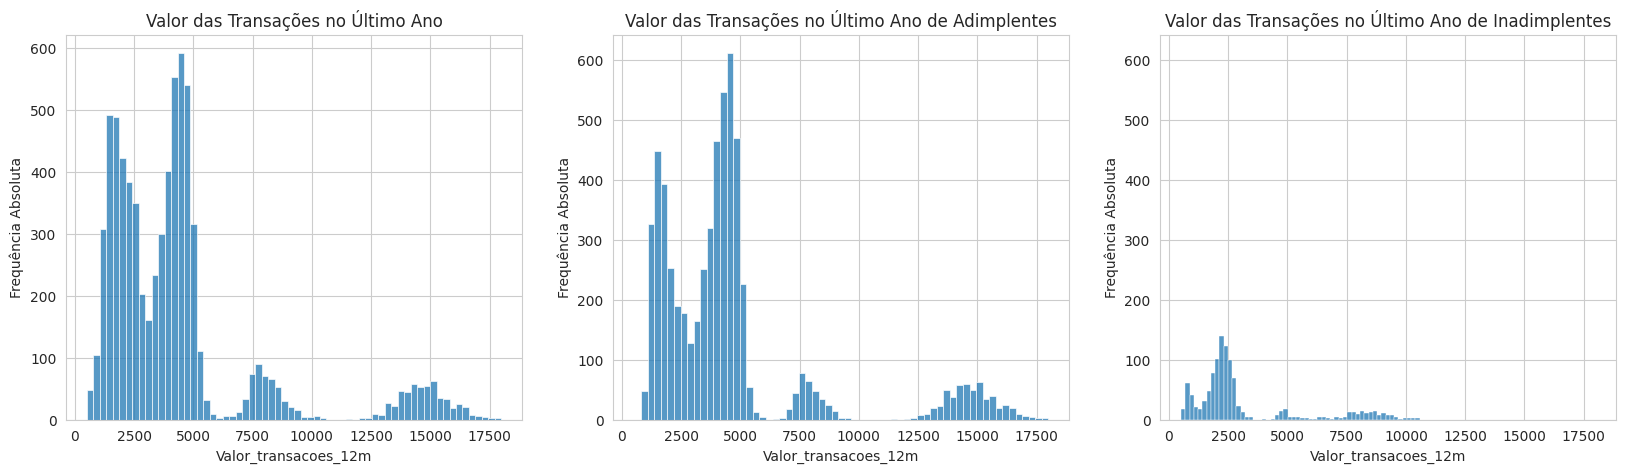

In [37]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

# loop para criar os gráficos
for dataframe in [df, df_adimplente, df_inadimplente]:

    # plotando o gráfico
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), 
                               ylabel='Frequência Absoluta')

    # ajustando o limite do eixo y
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

    figura.show()

A maioria das transações de clientes inadimplentes está concentrada em valores menores, especialmente entre 0 e 2500. Sendo seu pico principal é em torno de 1000 a 2000, que é mais baixo comparado ao pico dos clientes adimplentes.

Poucos clientes inadimplentes realizam transações de valor elevado, com quase nenhuma transação acima de 7500.

* **Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses**

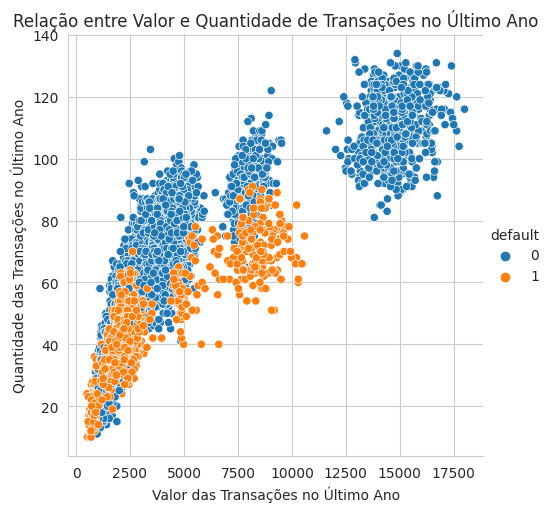

In [38]:
# plotando grafico
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

figura.show()

Diante deste gráfico podemos chegar a algumas conclusões:

1. Os pontos laranjas (clientes inadimplentes) estão majoritariamente concentrados na faixa de valor entre 0 e 10000 e com quantidade de transações entre 20 e 80
2. Poucos clientes inadimplentes fazem um número alto de transações (acima de 80) ou transações de valor elevado (acima de 7500).

3. A maioria dos pontos azuis (clientes adimplentes) tem a quantidade de transações entre 40 e 120
4. Há também uma concentração significativa de clientes adimplentes realizando transações de valores mais altos (acima de 10000) com uma quantidade de transações variando entre 80 e 140.

5. A presença de clientes inadimplentes diminui significativamente à medida que o valor das transações aumenta, especialmente acima de 7500.

**Insights:**

* Tipo de cartão: 
1. Existe uma presença perceptível de clientes inadimplentes com cartões silver
2. Ausência de clientes inadimplentes com cartões platinum e muito poucos com o cartão gold

* Quantidade de transações no ultimo ano:
1. Clientes adimplentes têm uma distribuição de transações mais ampla e mais elevada, indicando que eles tendem a ser mais ativos em termos de transações anuais. Sua concentração se encontra entre 40 e 80 transações por ano
2. Clientes inadimplentes realizam significativamente menos transações, com o pico de frequência de transações sendo menor comparado aos adimplentes. Sua concentração se encontra entre 20 e 60.

* Valor de transções no ultimo ano:
1. A maioria das transações de clientes inadimplentes está concentrada em valores menores, especialmente entre 0 e 2500. Sendo seu pico principal é em torno de 1000 a 2000, que é mais baixo comparado ao pico dos clientes adimplentes.
2. Poucos clientes inadimplentes realizam transações de valor elevado, com quase nenhuma transação acima de 7500.

* Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses:
1. Clientes inadimplentes estão majoritariamente concentrados na faixa de valor entre 0 e 10000 e com quantidade de transações entre 20 e 80
2. Poucos clientes inadimplentes fazem um número alto de transações (acima de 80) ou transações de valor elevado (acima de 7500).
4. Clientes adimplentes tem a quantidade de transações entre 40 e 120
5. Há também uma concentração significativa de clientes adimplentes realizando transações de valores mais altos (acima de 10000) com uma quantidade de transações variando entre 80 e 140.










**Recomendações:**
* Foco nos Cartões *Silver*": Realizar uma análise mais profunda sobre os clientes com cartões *silver* para entender por que uma proporção maior deles é inadimplente. Isso pode envolver revisar as condições de concessão desses cartões ou oferecer programas de educação financeira direcionados.
* Manutenção de Clientes *Platinum*: Continuar com os critérios rigorosos para os cartões *platinum*, pois parece eficaz em manter uma base de clientes adimplente.
* Apoio aos Clientes *Blue*: Embora a maioria dos clientes possua cartões *blue*, observar que a inadimplência também ocorre nesse grupo. Oferecer programas de suporte e monitoramento pode ajudar a reduzir a inadimplência.